# Multi linear regression

# ToyotaCorlla Dataset

In [1]:
# import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
# load ToyotaCorlla dataset
car = pd.read_csv("ToyotaCorolla.csv",encoding="latin-1")
car.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# Data cleaning

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
columns_to_drop = ['Id','Model','Mfg_Month', 'Mfg_Year',
                   'Fuel_Type','Met_Color','Color','Automatic',
                   'Cylinders','Mfr_Guarantee', 'BOVAG_Guarantee','Guarantee_Period',
                   'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
                   'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
                   'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
                   'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette','Tow_Bar']
car.drop(columns_to_drop, axis = 1, inplace= True)
car.sample(5)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
345,14950,41,28571,110,1600,5,5,85,1090
1334,6999,71,64000,110,1600,5,5,85,1070
898,8950,65,60000,86,1300,3,5,69,1015
702,8250,63,94504,86,1300,4,5,69,1000
308,11450,37,38812,97,1400,3,5,69,1025


In [5]:
#check for missing values
car.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [6]:
car.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [7]:
car.shape

(1436, 9)

In [8]:
car=car.rename(columns={'Price':'P','Age_08_04':'A','Door':'D','Gears':'G','Quarterly_Tax':'Q','Weight':'W'})

# Scatter plot

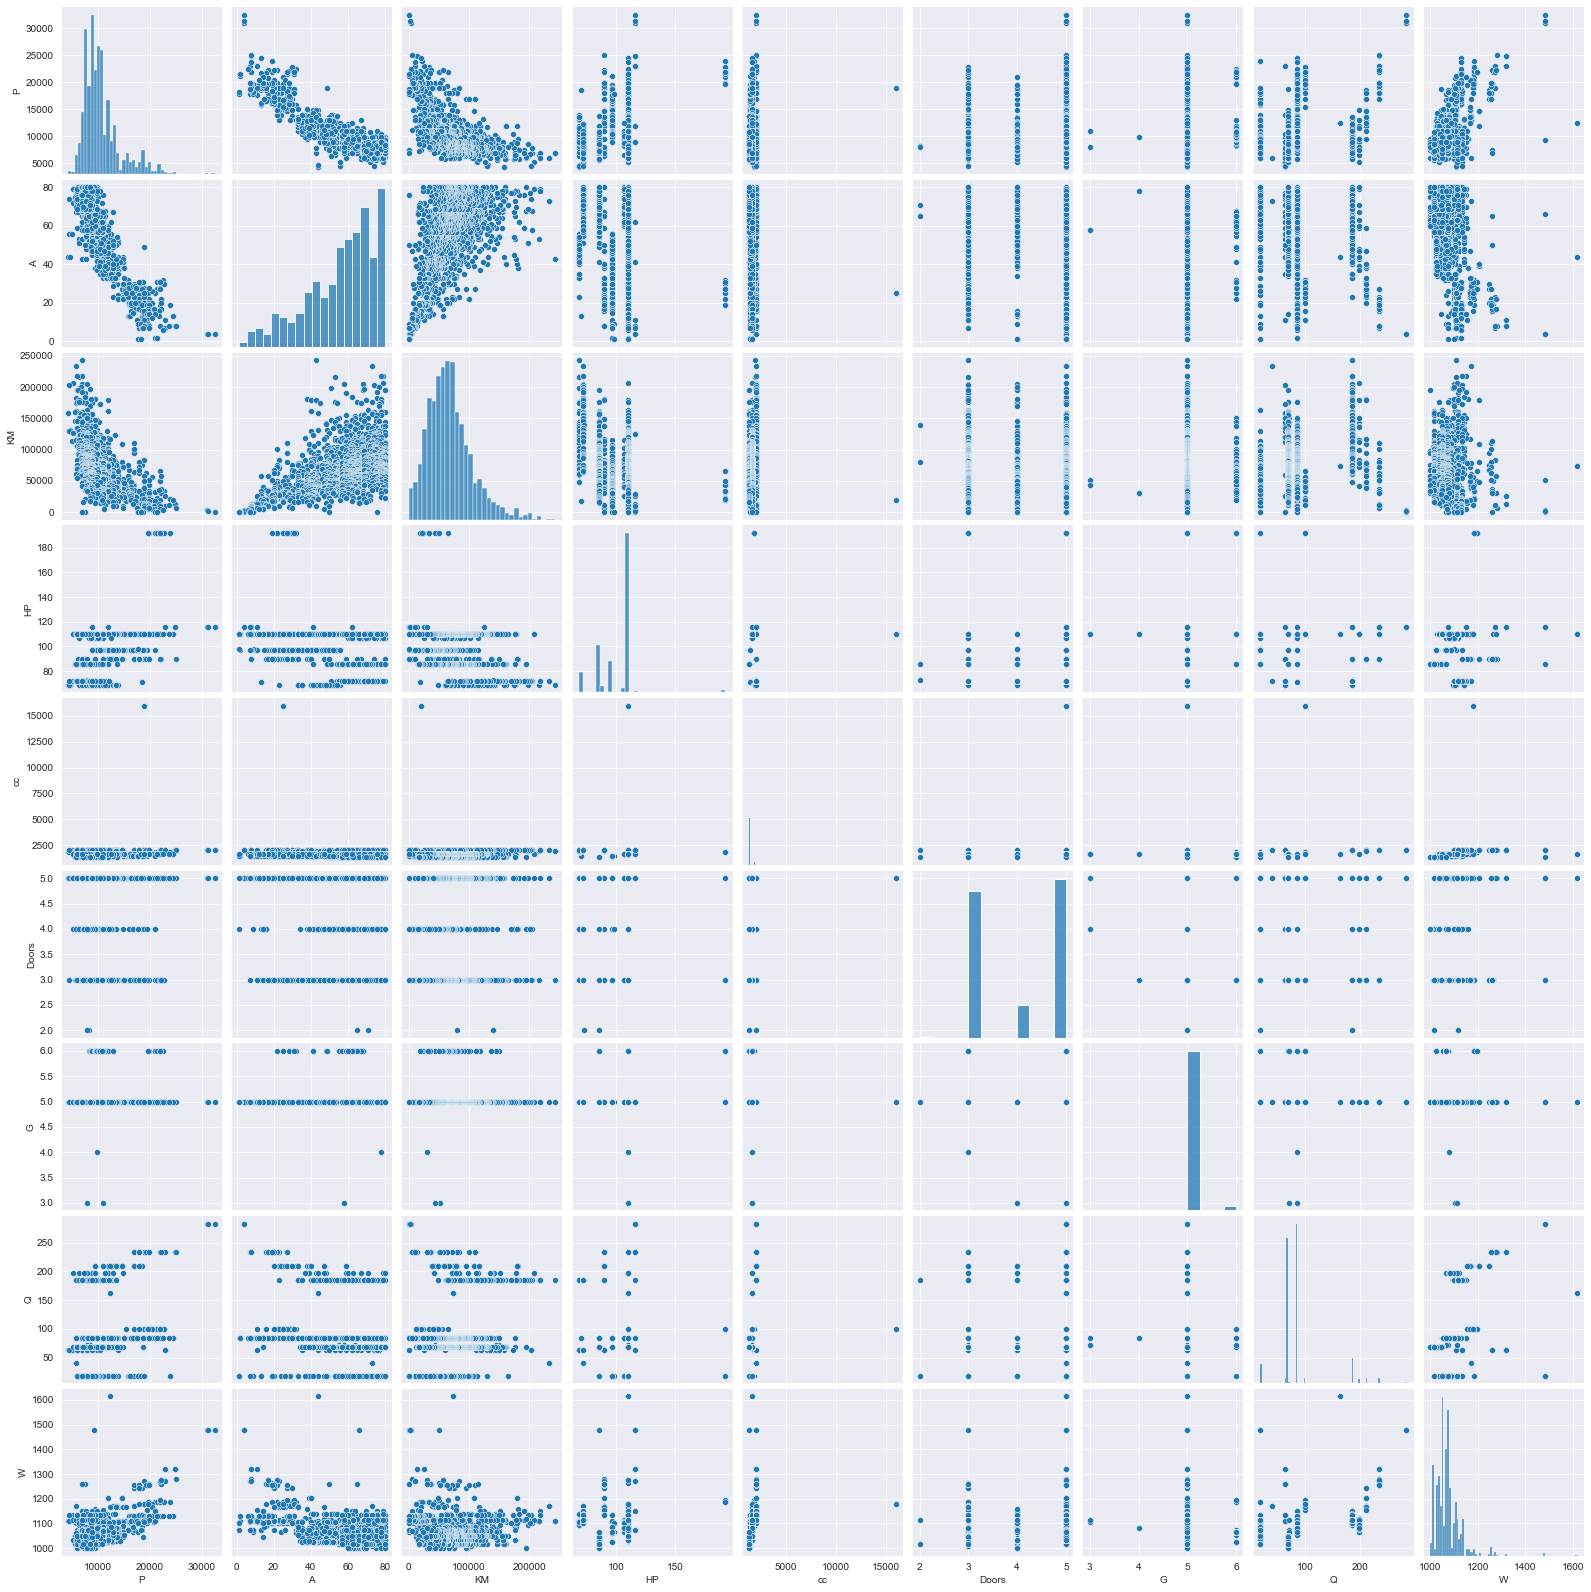

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(car)

# Preparing Model

In [10]:
car=car.rename(columns={'Price':'P','Age_08_04':'A','Door':'D','Gears':'G','Quarterly_Tax':'Q','Weight':'W'})

In [11]:
car.corr()

,P,A,KM,HP,cc,Doors,G,Q,W
P,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
A,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
G,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Q,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
W,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [12]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('P~A+KM+HP+cc+G+Q+W',data=car).fit()

In [13]:
#Coefficients
model.params

Intercept   -5575.140078
A            -121.658071
KM             -0.020819
HP             31.672841
cc             -0.121042
G             595.832420
Q               3.953059
W              16.947792
dtype: float64

In [14]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -3.954003
A           -46.528221
KM          -16.635958
HP           11.270379
cc           -1.344217
G             3.080822
Q             3.027187
W            16.400980
dtype: float64 
 Intercept     8.061841e-05
A            2.111306e-288
KM            6.123589e-57
HP            2.762121e-28
cc            1.790917e-01
G             2.103732e-03
Q             2.512611e-03
W             1.612185e-55
dtype: float64


In [15]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637625904386813, 0.8630947599996552)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:07:19   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
A           -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM            -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP            31.6728      2.810     11.270      0.000      26.160      37.186
cc            -0.1210      0.090     -1.344      0.179      -0.298       0.056
G            595.8324    193.400      3.081      0.002     216.453     975.212
Q              3.9531      1.306      3.027      0.003       1.391       6.515
W             16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear regression

In [17]:
# Preparing model based only on cc
ml_cc=smf.ols('P~cc',data = car).fit()  
#t and p-Values
print(ml_cc.tvalues, '\n', ml_cc.pvalues)  

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [18]:
ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           1.55e-06
Time:                        20:08:40   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### P-value of cc is less than 0.05. so it is significant 

# Calculating VIF 

In [19]:
#calculating VIF value

rsq_p = smf.ols('P~KM+HP+cc+G+Q+W',data=car).fit().rsquared  
vif_p = 1/(1-rsq_p) 

rsq_km = smf.ols('KM~HP+cc+G+Q+W+P',data=car).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_hp = smf.ols('HP~cc+G+Q+W+P+KM',data=car).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

rsq_cc = smf.ols('cc~G+Q+W+P+KM+HP',data=car).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_g = smf.ols('G~Q+W+P+KM+HP+cc',data=car).fit().rsquared  
vif_g = 1/(1-rsq_g) 

rsq_q = smf.ols('Q~W+P+KM+HP+cc+G',data=car).fit().rsquared  
vif_q = 1/(1-rsq_q) 

rsq_w = smf.ols('W~P+KM+HP+cc+G+Q',data=car).fit().rsquared  
vif_w = 1/(1-rsq_w) 

# Storing vif values in a data frame
d1 = {'Variables':['P','KM','HP','cc','G','Q','W'],'VIF':[vif_p,vif_km,vif_hp,vif_cc,vif_g,vif_q,vif_w]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,P,2.917358
1,KM,2.095546
2,HP,1.445087
3,cc,1.164596
4,G,1.063180
5,Q,2.312528
6,W,2.775560


# Residual Analaysis

# Test for Normality of Residual (Q-Q plot)

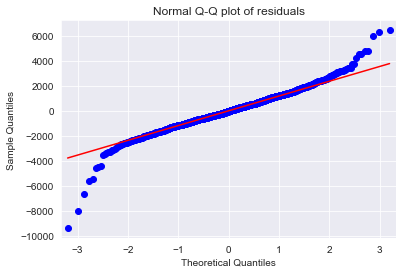

In [20]:
# Q-Q plot
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
list(np.where(model.resid>-4000))

[array([   0,    1,    2, ..., 1433, 1434, 1435], dtype=int64)]

# Residual plot for Homoscedasticity

In [22]:
# Residual plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

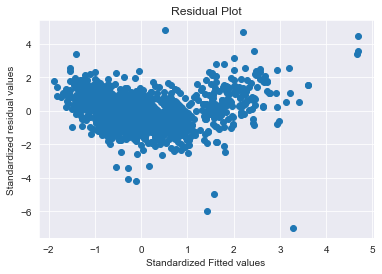

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regression

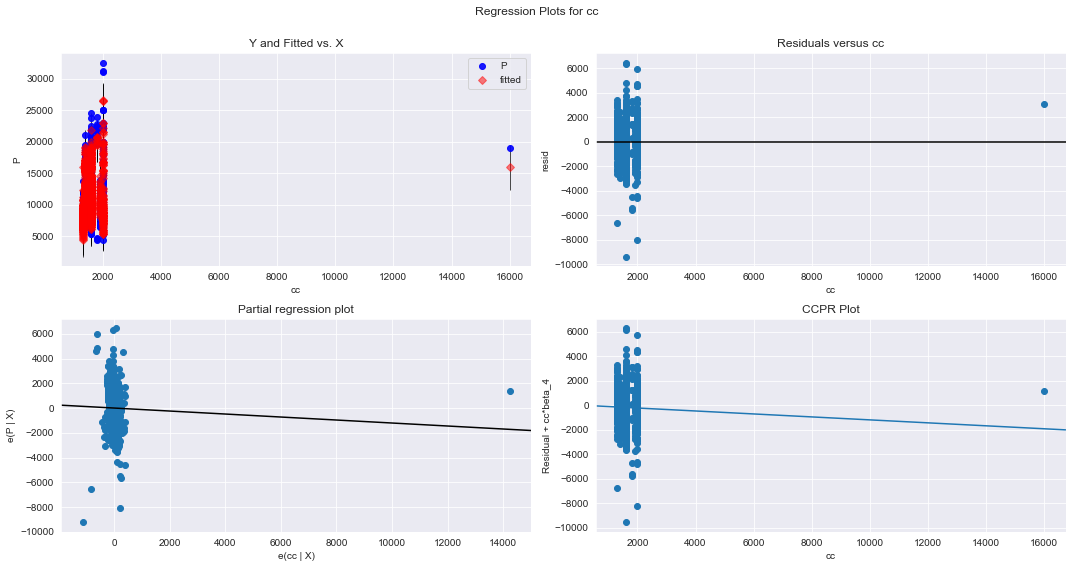

In [24]:
# Residual vs Regression
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

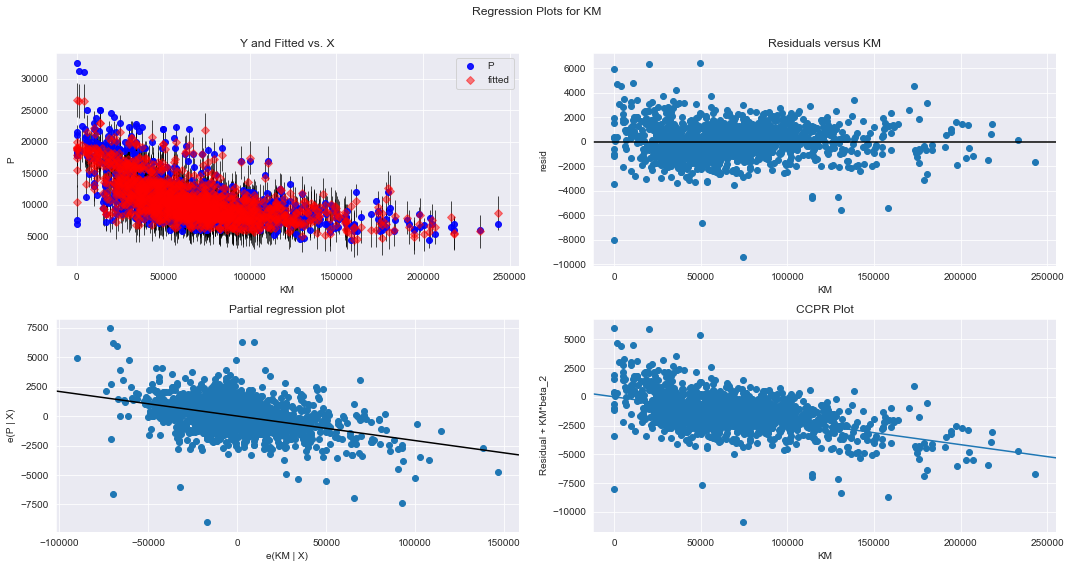

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

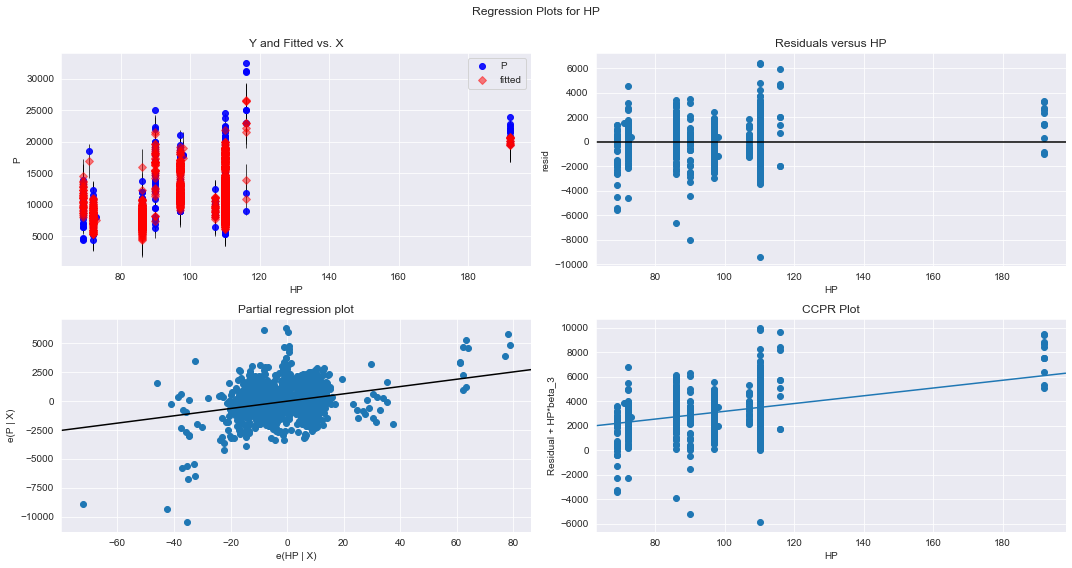

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

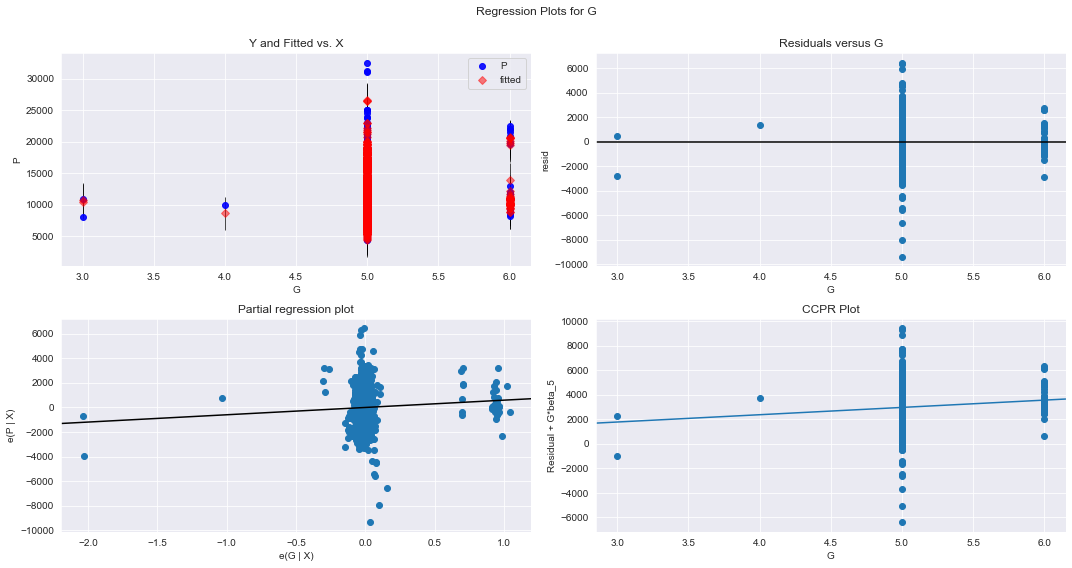

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "G", fig=fig)
plt.show()

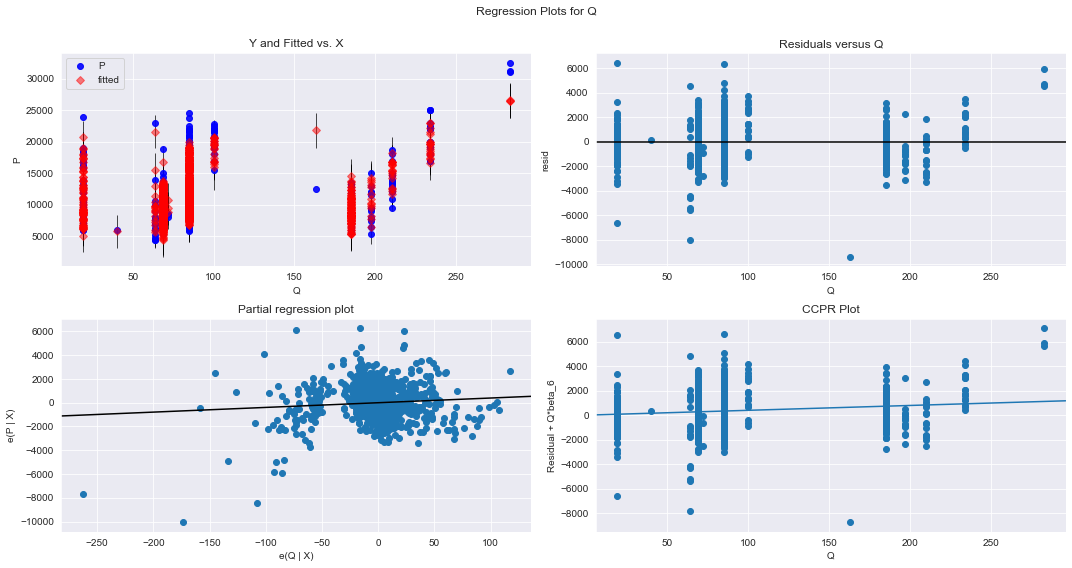

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Q", fig=fig)
plt.show()

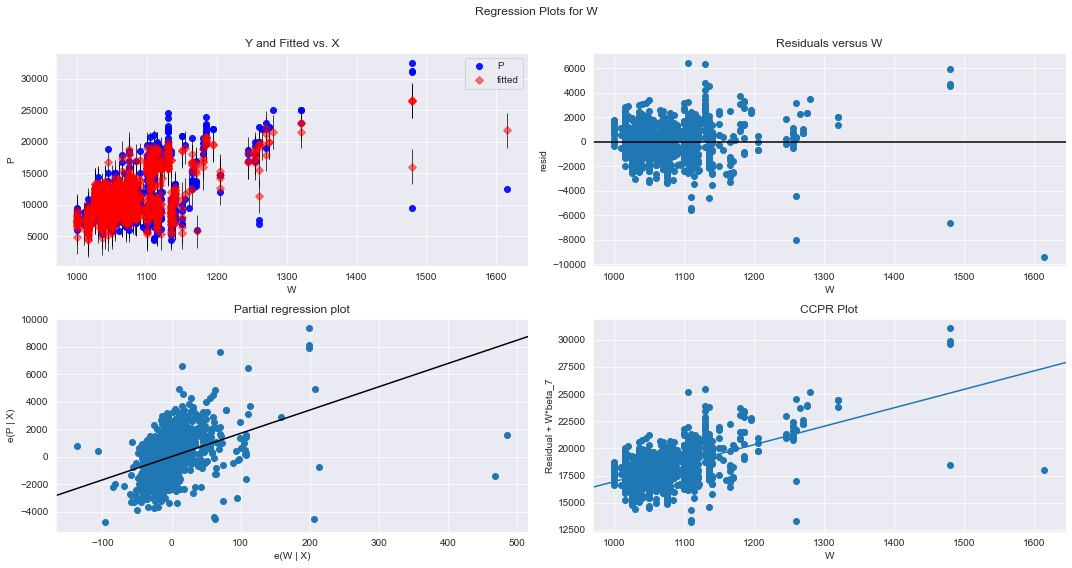

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "W", fig=fig)
plt.show()

# Model Deletion Diagnostics 

# Detecting Influencers/Outliers

# Cook's Distance

In [30]:
# Cook's Distance/ outliers
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

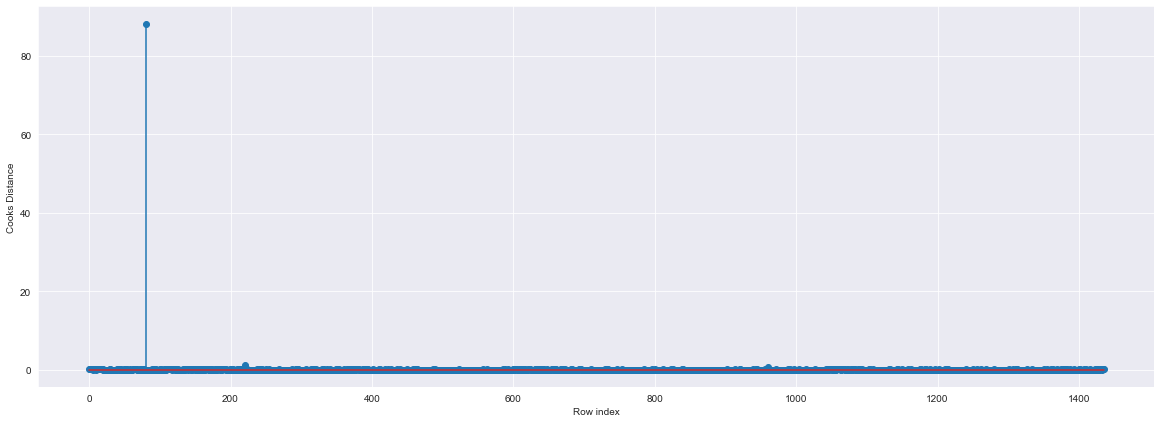

In [31]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(car)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 88.2598571029077)

# High Influence Points

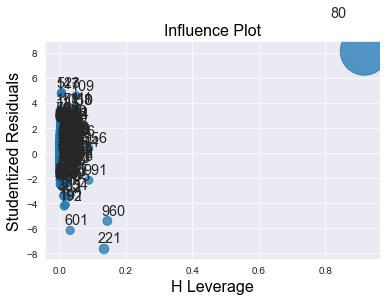

In [33]:
# High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [34]:
k = car.shape[1]
n = car.shape[0]
leverage_cutoff = 3*((k + 1)/n)

 #### From the above plot, it is evident that index data point 80 are high influencers so we can exclude that entire row

In [35]:
car[car.index.isin([80])]

,P,A,KM,HP,cc,Doors,G,Q,W
80,18950,25,20019,110,16000,5,5,100,1180


In [36]:
#See the differences in cc and other variable values
car

,P,A,KM,HP,cc,Doors,G,Q,W
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# Improving Model

In [37]:
#Load the data
car_new = pd.read_csv("ToyotaCorolla.csv",encoding="latin-1")

In [38]:
columns_to_drop = ['Id','Model','Mfg_Month', 'Mfg_Year',
                   'Fuel_Type','Met_Color','Color','Automatic',
                   'Cylinders','Mfr_Guarantee', 'BOVAG_Guarantee','Guarantee_Period',
                   'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
                   'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
                   'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
                   'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette','Tow_Bar']
car_new.drop(columns_to_drop, axis = 1, inplace= True)
car_new.sample(5)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
486,10750,50,61672,110,1600,5,5,85,1075
342,14950,42,29640,110,1600,3,5,85,1055
992,8950,68,43000,110,1600,5,5,69,1035
404,9450,52,104805,97,1400,3,5,69,1025
422,9250,53,90097,69,1900,5,5,185,1140


In [39]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=car_new.drop(car_new.index[[80]],axis=0).reset_index()

In [40]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [41]:
car1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [42]:
car1.shape

(1435, 9)

In [43]:
car1=car1.rename(columns={'Price':'P','Age_08_04':'A','Door':'D','Gears':'G','Quarterly_Tax':'Q','Weight':'W'})

# Build Model

In [44]:
#Exclude variable "cc" and generate R-Squared and AIC values
final_ml_cc= smf.ols('P~KM+HP+cc+G+Q+W',data = car1).fit()

In [45]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.6667985618833168, 26027.083330644426)

In [46]:
final_ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     476.3
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:13:48   Log-Likelihood:                -13007.
No. Observations:                1435   AIC:                         2.603e+04
Df Residuals:                    1428   BIC:                         2.606e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.034e+04   2049.595    -14.804      0.000   -3.44e+04   -2.63e+04
KM            -0.0483      0.002    -27.515      0.000      -0.052      -0.045
HP            36.5584      4.626      7.904      0.000      27.485      45.632
cc            -3.3504      0.488     -6.867      0.000      -4.307      -2.393
G            683.0626    302.016      2.262      0.024      90.620    1275.505
Q             15.1609      2.263      6.698      0.000      10.721      19.601
W             38.3847      1.600     23.986      0.000      35.245      41.524
==============================================================================
Omnibus:                      359.919   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5765.026
Skew:                          -0.722   Prob(JB):                         0.00
Kurtosis:                      12.713   Cond. No.                     2.91e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# Confidence values 99%
print(final_ml_cc.conf_int(0.01)) # 99% confidence level

                      0             1
Intercept -35628.250529 -25055.304136
KM            -0.052824     -0.043769
HP            24.627771     48.489023
cc            -4.608792     -2.091965
G            -95.919842   1462.044980
Q              9.322837     20.998920
W             34.257055     42.512308


# Cook's Distance

In [48]:
model_influence_cc = final_ml_cc.get_influence()
(c_cc, _) = model_influence_cc.cooks_distance

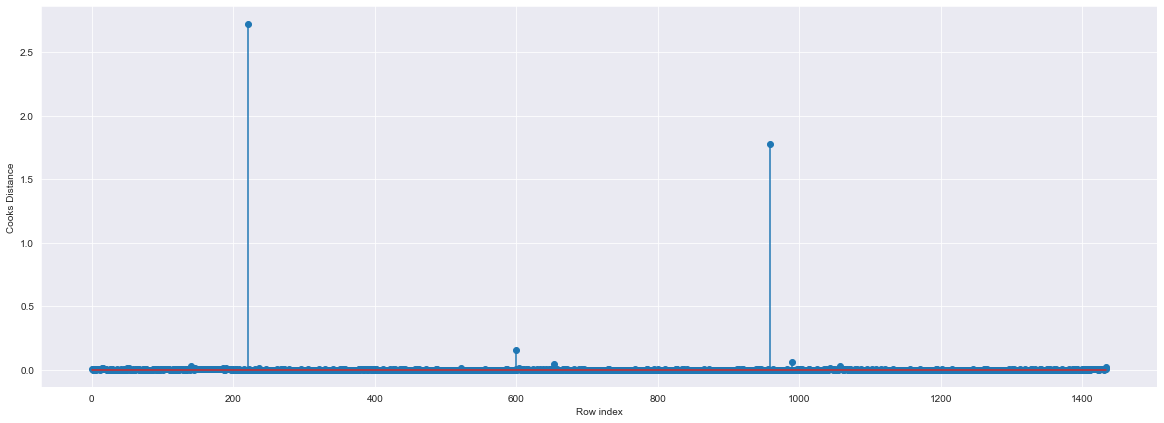

In [49]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_cc,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [50]:
#index of the data points where c is more than .5
(np.argmax(c_cc),np.max(c_cc))

(220, 2.7240128906478027)

In [51]:
#Drop 220 observations
car2=car1.drop(car1.index[[220]],axis=0)

In [52]:
car2

,P,A,KM,HP,cc,Doors,G,Q,W
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [53]:
car2.shape

(1434, 9)

In [54]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [55]:
car4=car3.drop(['index'],axis=1)

In [56]:
car4

,P,A,KM,HP,cc,Doors,G,Q,W
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [83]:
#Build the model on the new data
final_ml_cc= smf.ols('P~KM+HP+Q+W+G',data = car4).fit()

In [84]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.6737950701593258, 25977.29687195057)

In [85]:
final_ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     589.9
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:28:07   Log-Likelihood:                -12983.
No. Observations:                1434   AIC:                         2.598e+04
Df Residuals:                    1428   BIC:                         2.601e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.381e+04   2081.532    -16.243      0.000   -3.79e+04   -2.97e+04
KM            -0.0519      0.002    -32.095      0.000      -0.055      -0.049
HP            22.9540      4.333      5.298      0.000      14.455      31.453
Q              4.5467      2.037      2.232      0.026       0.551       8.543
W             38.7540      1.552     24.977      0.000      35.710      41.798
G            759.8790    298.642      2.544      0.011     174.054    1345.704
==============================================================================
Omnibus:                      196.562   Durbin-Watson:                   0.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1479.352
Skew:                          -0.387   Prob(JB):                         0.00
Kurtosis:                       7.915   Cond. No.                     2.99e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
#Again check for influencers
model_influence_cc = final_ml_cc.get_influence()
(c_cc, _) = model_influence_cc.cooks_distance

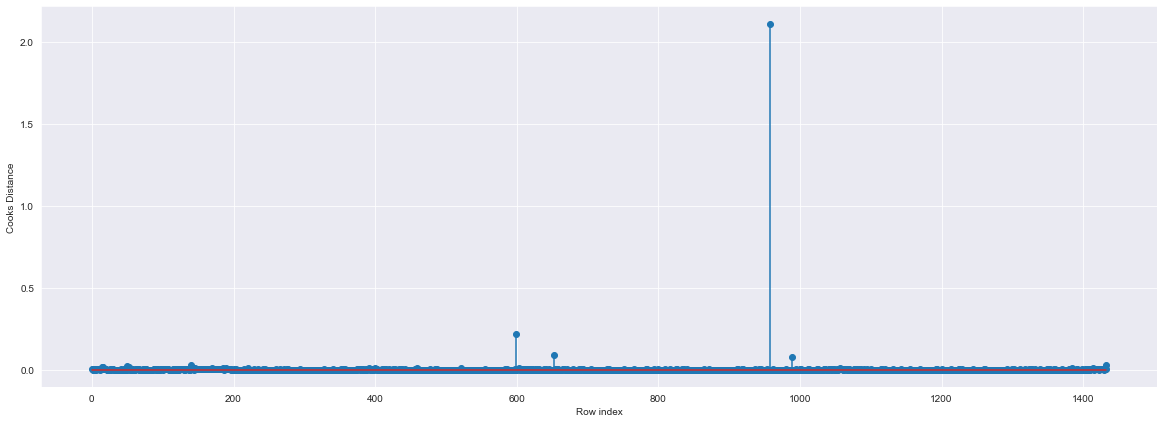

In [87]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_cc,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [88]:
#index of the data points where c is more than .5
(np.argmax(c_cc),np.max(c_cc))

(958, 2.112992498785254)

#### Since value >1, do again till we get <1 diagonal process

In [89]:
#Drop 958 observations
car5=car4.drop(car1.index[[958]],axis=0)

In [90]:
car5

,P,A,KM,HP,cc,Doors,G,Q,W
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [91]:
#Reset the index and re arrange the row values
car6=car5.reset_index()

In [92]:
car7=car6.drop(['index'],axis=1)

In [93]:
car7

,P,A,KM,HP,cc,Doors,G,Q,W
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [94]:
#Build the model on the new data
final_ml_cc= smf.ols('P~KM+HP+Q+W+G',data = car7).fit()

In [96]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.6923347538870235, 25876.204137586403)

In [97]:
final_ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     642.2
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:29:58   Log-Likelihood:                -12932.
No. Observations:                1433   AIC:                         2.588e+04
Df Residuals:                    1427   BIC:                         2.591e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.879e+04   2092.060    -18.541      0.000   -4.29e+04   -3.47e+04
KM            -0.0510      0.002    -32.401      0.000      -0.054      -0.048
HP            16.1999      4.272      3.792      0.000       7.821      24.579
Q             -1.2506      2.075     -0.603      0.547      -5.321       2.820
W             44.1835      1.617     27.327      0.000      41.012      47.355
G            819.5451    290.191      2.824      0.005     250.299    1388.791
==============================================================================
Omnibus:                      101.748   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.469
Skew:                          -0.176   Prob(JB):                     3.35e-94
Kurtosis:                       5.662   Cond. No.                     3.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
#Again check for influencers
model_influence_cc = final_ml_cc.get_influence()
(c_cc, _) = model_influence_cc.cooks_distance

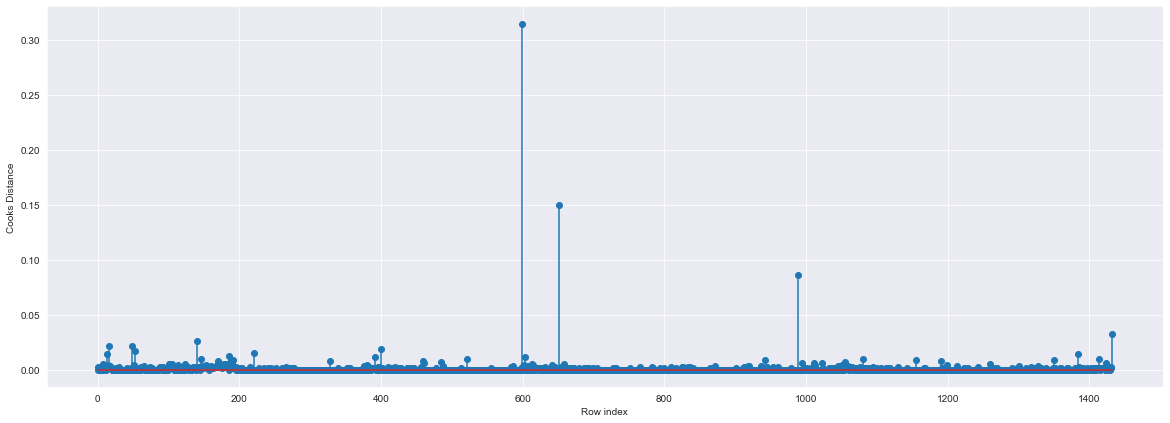

In [99]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car7)),np.round(c_cc,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [100]:
#index of the data points where c is more than .5
(np.argmax(c_cc),np.max(c_cc))

(599, 0.3148523147567107)

#### Since the value is <1, we can stop the diagnostic process and finalize the model

In [101]:
#Check the accuracy of the mode
final_ml_cc= smf.ols('P~KM+HP+Q+G+W',data = car7).fit()

In [102]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.6923347538870235, 25876.204137586403)

In [103]:
final_ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     642.2
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:31:39   Log-Likelihood:                -12932.
No. Observations:                1433   AIC:                         2.588e+04
Df Residuals:                    1427   BIC:                         2.591e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.879e+04   2092.060    -18.541      0.000   -4.29e+04   -3.47e+04
KM            -0.0510      0.002    -32.401      0.000      -0.054      -0.048
HP            16.1999      4.272      3.792      0.000       7.821      24.579
Q             -1.2506      2.075     -0.603      0.547      -5.321       2.820
G            819.5451    290.191      2.824      0.005     250.299    1388.791
W             44.1835      1.617     27.327      0.000      41.012      47.355
==============================================================================
Omnibus:                      101.748   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.469
Skew:                          -0.176   Prob(JB):                     3.35e-94
Kurtosis:                       5.662   Cond. No.                     3.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predicting for new data

In [104]:
#New data for prediction
new_data=pd.DataFrame({"A":25,"KM":45000,"HP":90,"cc":2000,"D":3,"G":5,"Q":210,"W":1165},index=[1])

In [105]:
final_ml_cc.predict(new_data)

1    15685.849449
dtype: float64

In [106]:
car_new=car_new.rename(columns={'Price':'P','Age_08_04':'A','Door':'D','Gears':'G','Quarterly_Tax':'Q','Weight':'W'})

In [107]:
final_ml_cc.predict(car_new.iloc[0:9,])

0    15584.644137
1    14262.197484
2    15853.454822
3    15532.971334
4    16238.003042
5    15091.417181
6    16692.335947
7    17646.448262
8    19648.749860
dtype: float64

In [108]:
pred_y = final_ml_cc.predict(car_new)

In [109]:
pred_y

0       15584.644137
1       14262.197484
2       15853.454822
3       15532.971334
4       16238.003042
            ...     
1431    10857.957976
1432    10494.803890
1433    10595.907283
1434    10601.003220
1435    16288.480060
Length: 1436, dtype: float64

#### The Prediction for ToyotaCorlla_dataset is predicted and  the random value of 'Age_08_04' =25,'Door'=3,'Gears'=5,'cc'=2000,'Quarterly_Tax'=210,'Weight'=1165,KM=45000 is given randomly and Price is  obtained 15685.84 .

#### R-Squared value of the given ToyotaCorlla_dataset model is 69%. which means it's ok model. it's b

#### Multi linear regression first step is to import all the libraries and load the dataset of ToyotaCorlla and then do data cleaning for the given dataset.Next step is to do Data Visulization and then Prepare model for dataset with ols model with price as output and input as Age_08_04, Door, Gears, cc, Quarterly_Tax, weight, KM. And then do simple linear regression for all the parameter and then find pvalue and rsquare for all the build model and calculate VIF. And to Residual Analaysis and then do Model Deletion Diagnostics for removing outliers. Next step is to do imporving the model by removing the high infulence data in the ToyotaCorlla dataset(cc) and do the step again for preparing model. Now Predict the model by giving random input for Age_08_04, Door, Gears, Quartely_Tax, cc, weight, KM and then find output for Price.